# RiskOptima

In [7]:
!pip install --upgrade riskoptima

  Attempting uninstall: riskoptima
    Found existing installation: riskoptima 1.18.0
    Uninstalling riskoptima-1.18.0:
      Successfully uninstalled riskoptima-1.18.0


In [3]:
import pandas as pd
from riskoptima import RiskOptima

import warnings
warnings.filterwarnings(
    "ignore", 
    category=FutureWarning, 
    message=".*DataFrame.std with axis=None is deprecated.*"
)

# Define your current porfolio with your weights and company names
asset_data = [
    {"Asset": "MO",    "Weight": 0.04, "Label": "Altria Group Inc.",       "MarketCap": 110.0e9},
    {"Asset": "NWN",   "Weight": 0.14, "Label": "Northwest Natural Gas",   "MarketCap": 1.8e9},
    {"Asset": "BKH",   "Weight": 0.01, "Label": "Black Hills Corp.",         "MarketCap": 4.5e9},
    {"Asset": "ED",    "Weight": 0.01, "Label": "Con Edison",                "MarketCap": 30.0e9},
    {"Asset": "PEP",   "Weight": 0.09, "Label": "PepsiCo Inc.",              "MarketCap": 255.0e9},
    {"Asset": "NFG",   "Weight": 0.16, "Label": "National Fuel Gas",         "MarketCap": 5.6e9},
    {"Asset": "KO",    "Weight": 0.06, "Label": "Coca-Cola Company",         "MarketCap": 275.0e9},
    {"Asset": "FRT",   "Weight": 0.28, "Label": "Federal Realty Inv. Trust", "MarketCap": 9.8e9},
    {"Asset": "GPC",   "Weight": 0.16, "Label": "Genuine Parts Co.",         "MarketCap": 25.3e9},
    {"Asset": "MSEX",  "Weight": 0.05, "Label": "Middlesex Water Co.",       "MarketCap": 2.4e9}
]
asset_table = pd.DataFrame(asset_data)

capital = 100_000

asset_table['Portfolio'] = asset_table['Weight'] * capital

ANALYSIS_START_DATE = RiskOptima.get_previous_year_date(RiskOptima.get_previous_working_day(), 1)
ANALYSIS_END_DATE   = RiskOptima.get_previous_working_day()
BENCHMARK_INDEX     = 'SPY'
RISK_FREE_RATE      = 0.05
NUMBER_OF_WEIGHTS   = 10_000
NUMBER_OF_MC_RUNS   = 1_000

print(asset_table)

  Asset  Weight                      Label     MarketCap  Portfolio
0    MO    0.04          Altria Group Inc.  1.100000e+11     4000.0
1   NWN    0.14      Northwest Natural Gas  1.800000e+09    14000.0
2   BKH    0.01          Black Hills Corp.  4.500000e+09     1000.0
3    ED    0.01                 Con Edison  3.000000e+10     1000.0
4   PEP    0.09               PepsiCo Inc.  2.550000e+11     9000.0
5   NFG    0.16          National Fuel Gas  5.600000e+09    16000.0
6    KO    0.06          Coca-Cola Company  2.750000e+11     6000.0
7   FRT    0.28  Federal Realty Inv. Trust  9.800000e+09    28000.0
8   GPC    0.16          Genuine Parts Co.  2.530000e+10    16000.0
9  MSEX    0.05        Middlesex Water Co.  2.400000e+09     5000.0


## Create Portfolio Area Chart

  Asset  Close(T-2)    Close(T)  2d % Change
0    MO   59.669998   60.040001     0.620082
1   NWN   96.699997   96.309998    -0.403309
2   BKH  109.800003  110.970001     1.065572
3    ED  118.440002  121.699997     2.752444
4   PEP   64.550003   67.599998     4.725012
5   NFG   53.840000   53.849998     0.018570
6    KO   49.389999   50.570000     2.389148
7   FRT   72.050003   72.540001     0.680080
8   GPC   40.000000   40.820000     2.049999
9  MSEX  144.350006  145.639999     0.893657


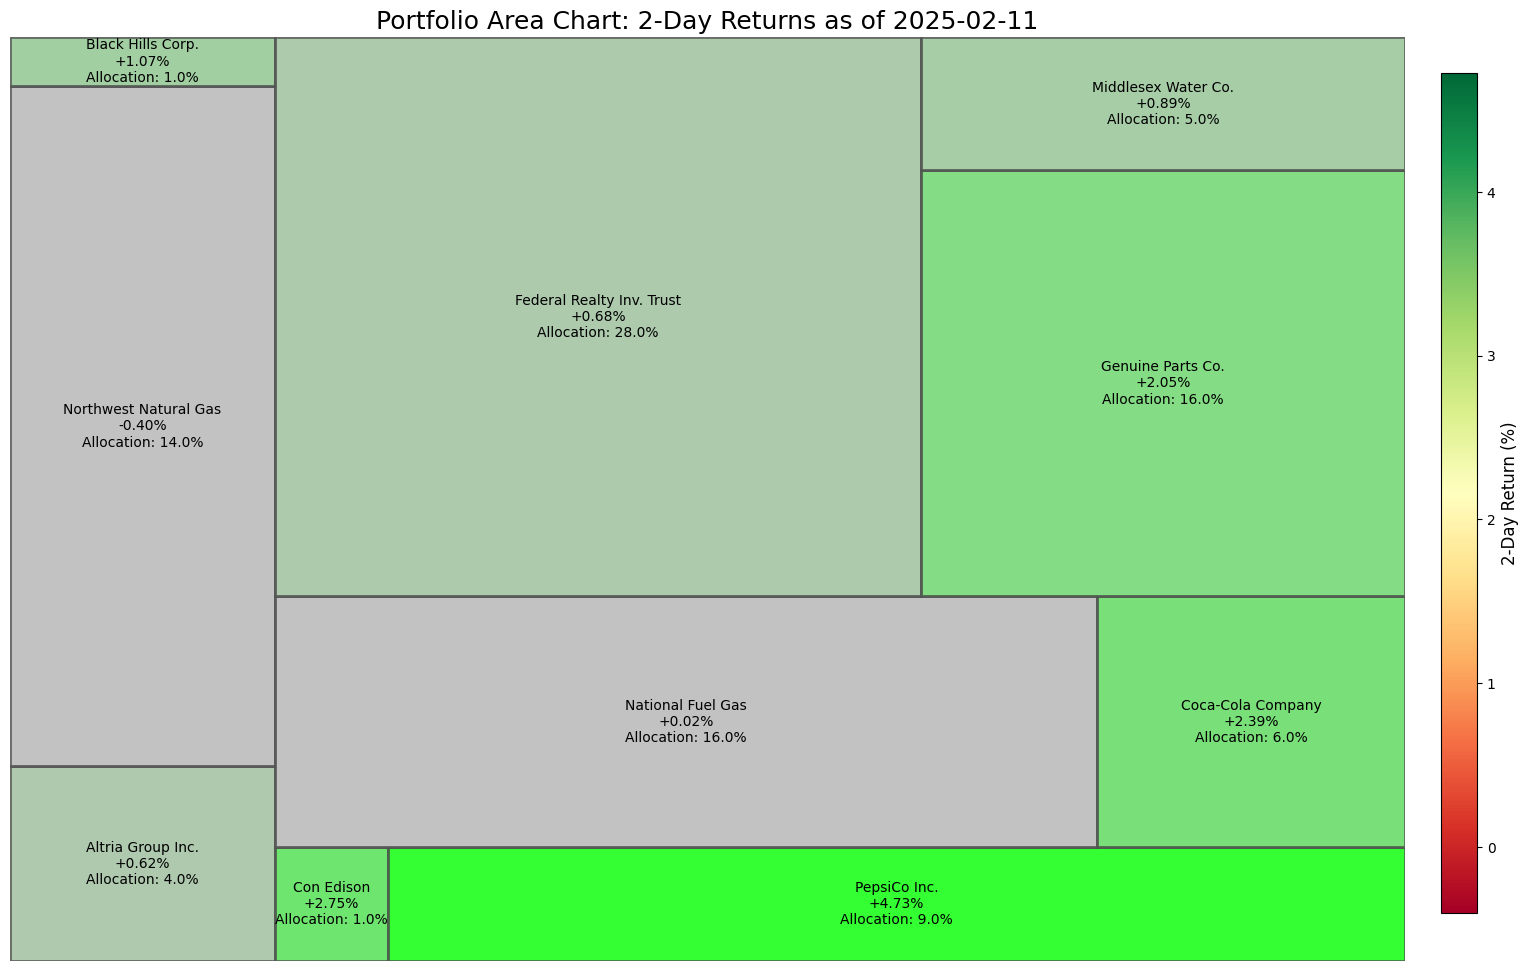

In [5]:
RiskOptima.create_portfolio_area_chart(
    asset_table,
    end_date=ANALYSIS_END_DATE,
    lookback_days=2,
    title="Portfolio Area Chart"
)

## Efficient Frontier with Monte Carlo Simulation

In [ ]:
RiskOptima.plot_efficient_frontier_monte_carlo(
    asset_table,
    start_date=ANALYSIS_START_DATE,
    end_date=ANALYSIS_END_DATE,
    risk_free_rate=RISK_FREE_RATE,
    num_portfolios=NUMBER_OF_WEIGHTS,
    market_benchmark=BENCHMARK_INDEX,
    set_ticks=False,
    x_pos_table=1.15,    # Position for the weight table on the plot
    y_pos_table=0.52,    # Position for the weight table on the plot
    title=f'Efficient Frontier - Monte Carlo Simulation {ANALYSIS_START_DATE} to {ANALYSIS_END_DATE}'
)

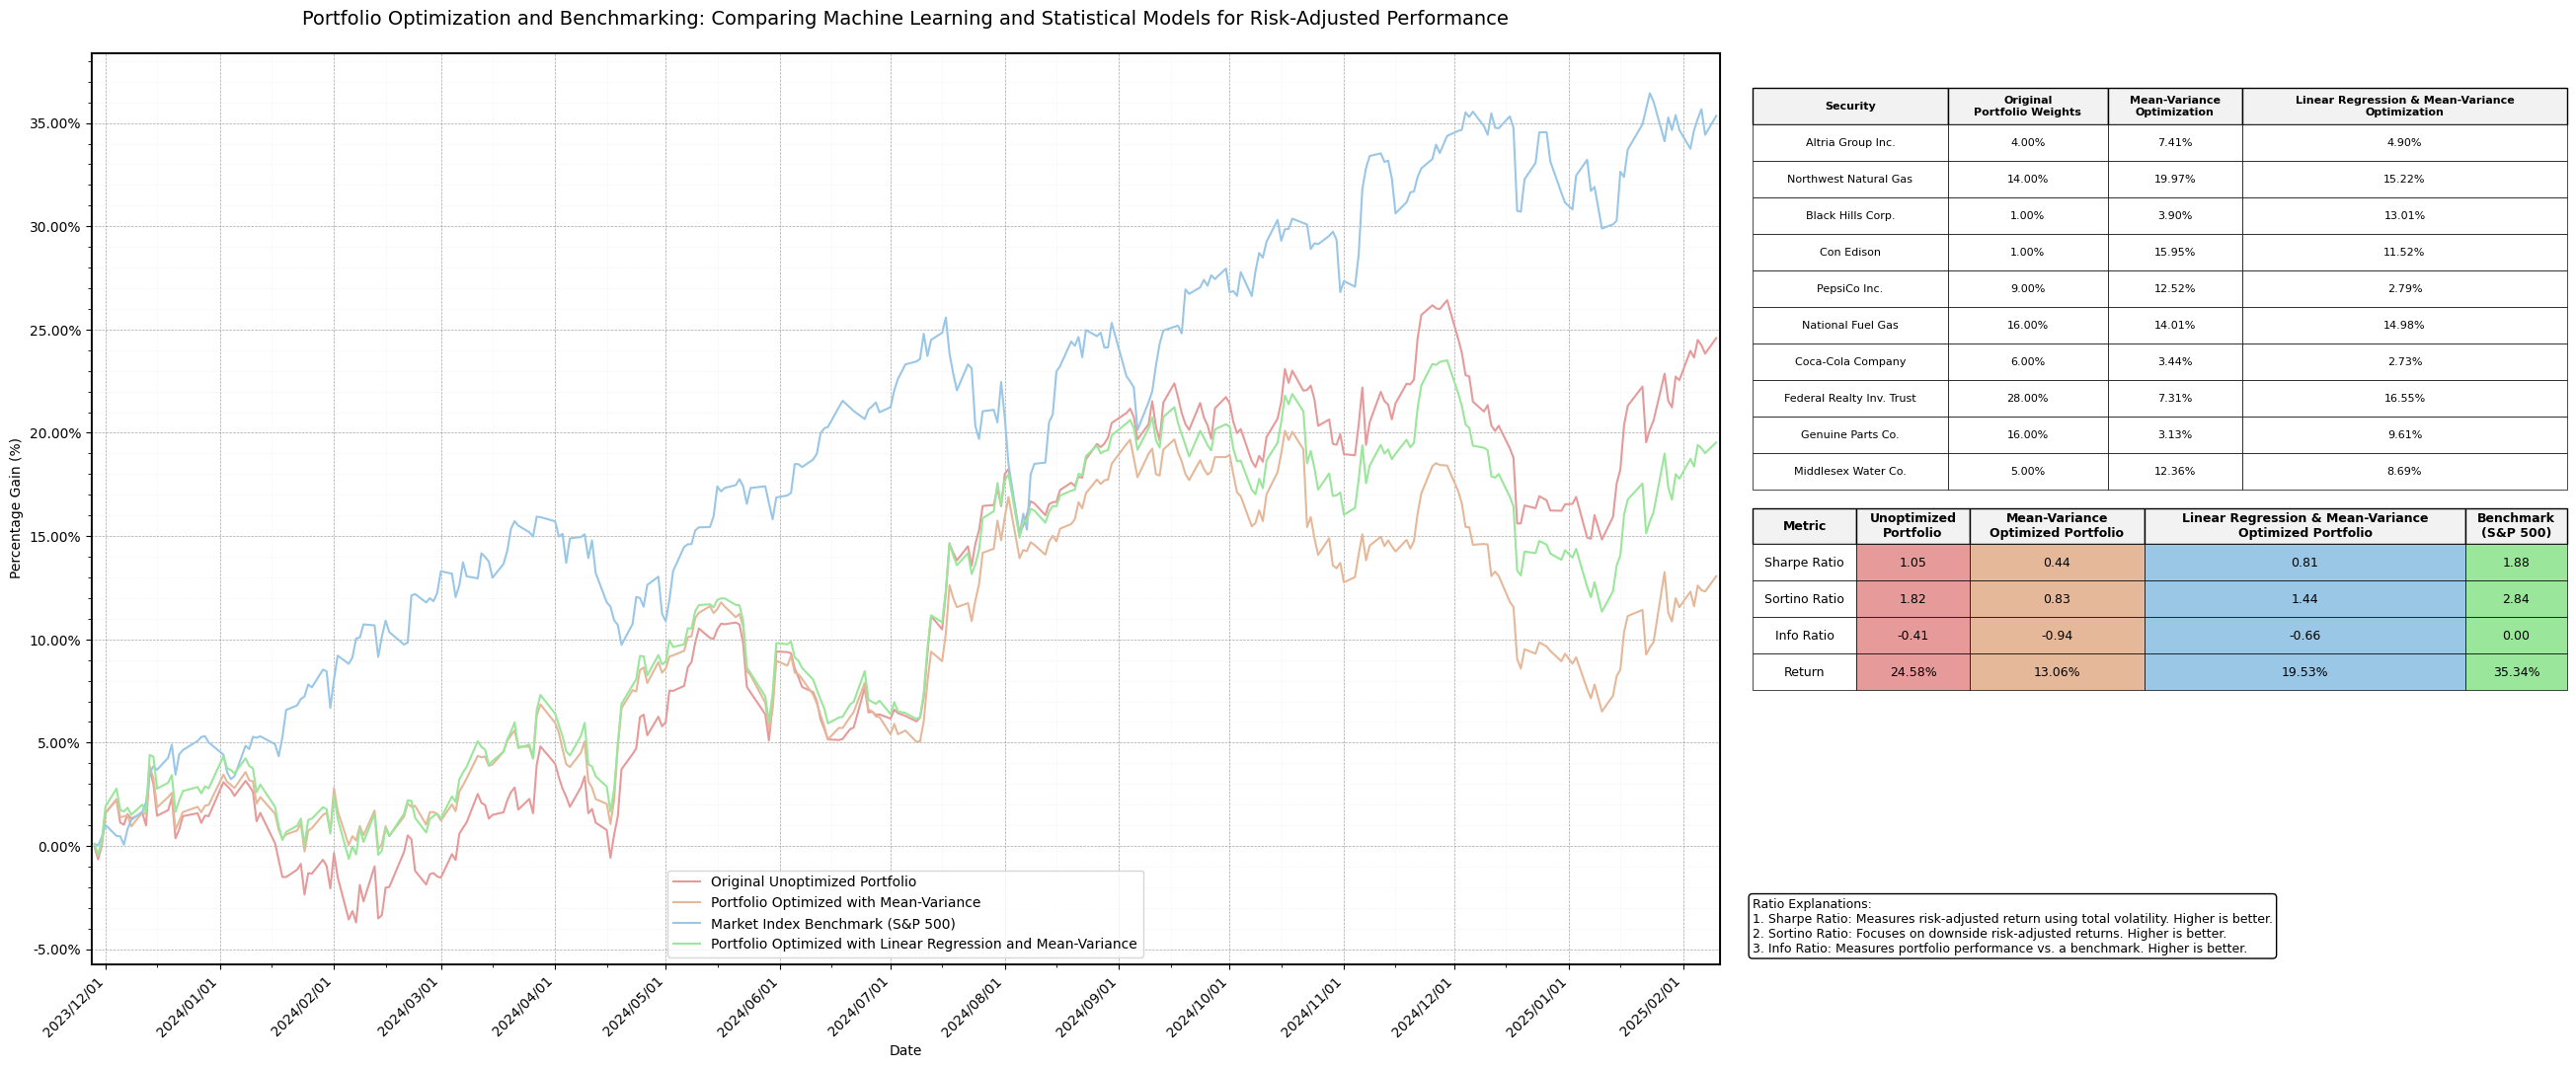

In [6]:
RiskOptima.run_portfolio_optimization_mv_ml(
    asset_table=asset_table,
    training_start_date='2022-01-01',
    training_end_date='2023-11-27',
    model_type='Linear Regression',    
    risk_free_rate=RISK_FREE_RATE,
    num_portfolios=100000,
    market_benchmark=[BENCHMARK_INDEX],
    max_volatility=0.25,
    min_weight=0.03,
    max_weight=0.2
)

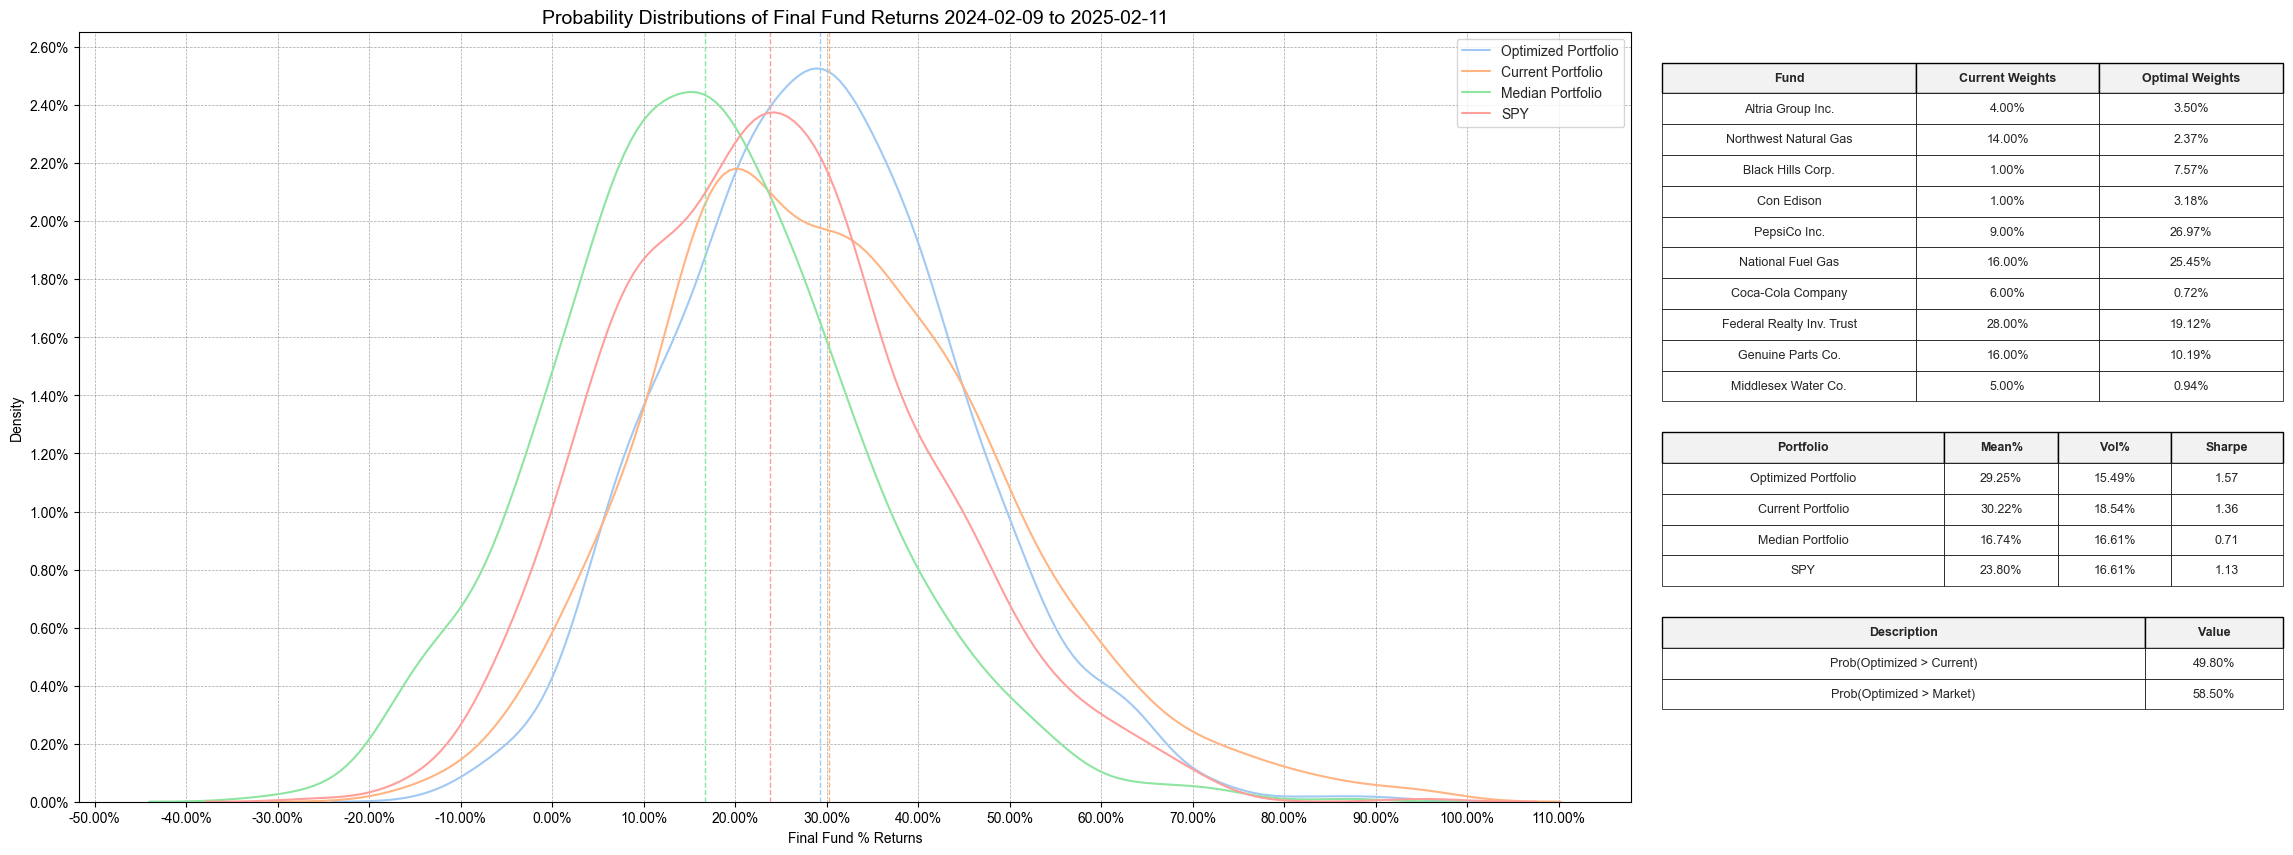

In [7]:
RiskOptima.run_portfolio_probability_analysis(
    asset_table=asset_table,
    analysis_start_date=ANALYSIS_START_DATE,
    analysis_end_date=ANALYSIS_END_DATE,
    benchmark_index=BENCHMARK_INDEX,
    risk_free_rate=RISK_FREE_RATE,
    number_of_portfolio_weights=NUMBER_OF_WEIGHTS,
    trading_days_per_year=RiskOptima.get_trading_days(),
    number_of_monte_carlo_runs=NUMBER_OF_MC_RUNS
)